In [126]:
import numpy as np
import matplotlib.pyplot as plt

import time

In [18]:
class Frog():
    '''
    Create a frog player for frogger
    '''
    
    def __init__(self,road_width):
        '''
        road_width is the value of the road's positive edge in which this frog is playing
        '''
        self.lane = 0
        self.pos = 0
        self.road_width = road_width
        
    def move_up(self):
        '''Frog moves up one lane'''
        self.lane+=1
        
    def move_down(self):
        '''Frog moves down one lane (if possible)'''
        if (self.lane>0):
            self.lane-=1
    
    def move_left(self):
        '''From moves to the left if possible'''
        if (self.pos>-self.road_width):
            self.pos-=1

    def move_right(self):
        '''From moves to the right if possible'''
        if (self.pos<self.road_width):
            self.pos+=1

In [169]:
class Car():
    
    def __init__(self,road_width,lane,left,velocity=1,size=2):
        self.lane = lane
        if (left):
            self.pos = -road_width
            self.velocity = velocity
        else:
            self.pos = road_width
            self.velocity = -velocity
        self.size = size
        
    def move(self):
        self.pos+=self.velocity

In [188]:
class Road():
    
    def __init__(self,lanes,width):
        self.lanes = lanes
        self.width = width
        self.cars = []
    
    def add_frog(self):
        self.frog = Frog(self.width)
        return self.frog
    
    def check_victory(self):
        if (self.frog.lane>=self.lanes):
            print('Victory')
            
    def add_car(self):
        # defaults
        self.cars.append(Car(self.width,
                             np.random.randint(self.lanes),
                            (np.random.randint(2)==0)))
        
    def update(self):
        for car in self.cars:
            car.move()
    
    def render(self):
        # asphalt background 127 129 135
        image = np.ones((self.lanes,self.width*2+1,3),dtype=int) * [127,129,135]
        # paint frog (start from bottom left)
        l,p = (self.lanes-self.frog.lane-1,self.width+self.frog.pos)
        image[l,p,:] = (0,204,0)
        # paint cars
        for car in self.cars:
            l,p = (self.lanes-car.lane-1,self.width+car.pos)
            for i in range(car.size):
                image[l,p+i*np.sign(car.velocity),:] = (255,0,0)
            
        return image

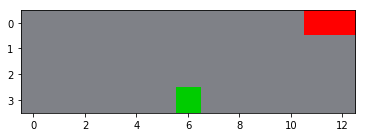

In [194]:
road = Road(4,6)
frog = road.add_frog()
road.add_car()
im = road.render()
plt.imshow(im)
plt.show()

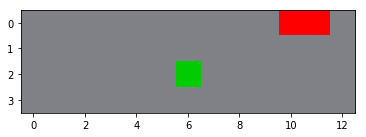

In [195]:
road.update()
frog.move_up()
road.check_victory()
im = road.render()
plt.imshow(im)
plt.show()

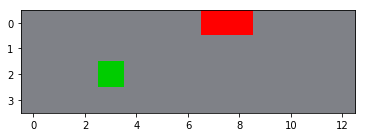

In [198]:
road.update()
frog.move_left()
im = road.render()
plt.imshow(im)
plt.show()